<a href="https://colab.research.google.com/github/MathMikkelsen/Lasers/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
R_in=0.035
R_out=0.035
t_in=1-R_in
t_out=1-R_out
E_0=1
#angle of incidence
theta_0=0.2
#wedge angle
alpha=10**-4

phi=1
#thickness of wedge
w=1
n=1
nmax=10
#n'th angle of incidence (missing negative incidence)
def theta_n(theta_0,alpha,n):
  return theta_0+2*(n-1)*alpha

#wavelength
def phase_n(theta_0, alpha, w, n):
    return 2*np.pi*w*(np.sin(theta_n(theta_0,alpha,n))-np.sin(theta_0))

#n>=2
def E_trans(r_in,r_out,E_0,theta_0,alpha,n):
    Sum=0
    for i in range(2,nmax):
        Sum+=(r_in*r_out)**i*np.exp(1j*(phase_n(theta_0, alpha, w, i)+(i-1)*(phi1_out+phi1_in)))
    return E_0*(1-r_in)*(1-r_out)*(1+(r_in*r_out)**-1*Sum)

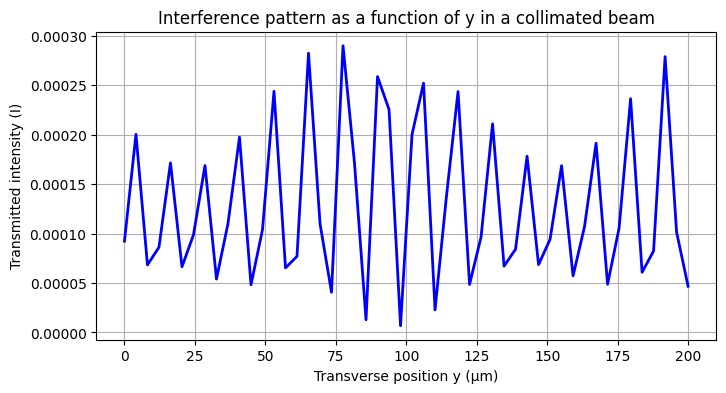

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
R_in = 0.99  # Reflectivity at the first surface
R_out = 0.99  # Reflectivity at the second surface
t_in = np.sqrt(1 - R_in)  # Transmittance at the first surface
t_out = np.sqrt(1 - R_out)  # Transmittance at the second surface
r_in = np.sqrt(R_in)
r_out = np.sqrt(R_out)

# Beam parameters
E_0 = 1  # Initial electric field amplitude
theta_0 = 0.1  # Angle of incidence (radians)
alpha = 3e-5  # Wedge angle (radians)
n_max = 80  # Maximum number of reflections
wavelength = 602e-9  # Wavelength in meters
D = 0.1  # Distance in the x-axis

# Collimated beam parameters
beam_width = 100e-6  # Beam width in meters

# Range of y to visualize (in micrometers)
y_min_um = 0   # Minimum in μm
y_max_um = 200  # Maximum in μm
num_rays = 50   # Number of partial rays in the beam

# Convert to meters
y_min = y_min_um * 1e-6
y_max = y_max_um * 1e-6

# Define incidence positions within the beam (y)
y_values = np.linspace(y_min, y_max, num_rays)

# Define thickness values as a function of x
e_0 = 2.3e-6  # Thickness at the lower point of the wedge (in meters)
e_values = e_0 + y_values * np.tan(alpha)  # Thickness at each point of the beam

# Function to calculate the angle at the n-th reflection
def theta_n(theta_0, alpha, n):
    return theta_0 + (2 * n - 1) * alpha

# Function to calculate the accumulated phase at the n-th reflection
def phase_n(theta_0, alpha, e, n):
    return (
        ((e * np.sin(theta_n(theta_0, alpha, n)) - np.sin(theta_0)) / np.tan(alpha)
         - D * (np.tan(theta_0) * (np.sin(theta_n(theta_0, alpha, n)) - np.sin(theta_0))
                - np.cos(theta_n(theta_0, alpha, n)) + np.cos(theta_0)))
        * (2 * np.pi / wavelength))

# Function to calculate the transmitted amplitude for a single ray
def E_trans(E_0, r_in, r_out, t_in, t_out, theta_0, alpha, e, n_max):
    Sum = 0
    for n in range(2, n_max):  # The sum starts at n=2
        phi = phase_n(theta_0, alpha, e, n)
        Sum += (r_in * r_out) ** n * np.exp(1j * phi)
    return E_0 * t_in * t_out * (1 + (r_in * r_out) ** -1 * Sum)

# Compute transmitted intensity as a function of transverse position y
I_y = [np.abs(E_trans(E_0, r_in, r_out, t_in, t_out, theta_0, alpha, e, n_max))**2 for e in e_values]



# Plot interference pattern as a function of transverse position y
plt.figure(figsize=(8, 4))
plt.plot(y_values * 1e6, I_y, 'b-', linewidth=2)  # Convert y to micrometers for the plot
plt.xlabel("Transverse position y (μm)")
plt.ylabel("Transmitted intensity (I)")
plt.title("Interference pattern as a function of y in a collimated beam")
plt.grid(True)
plt.show()

